##**PUBG Game Prediction**

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves. 

In this project we will be targeting the percentile winning placement of the players using machine learning techniques.

You can download the data from this link I provided :

https://drive.google.com/file/d/10fU0X94Rxob3De6gB98tQRUc--ogmH7G/view?usp=sharing

**PUBG Data Description :**

* DBNOs- Number of enemy players knocked.
* assists- Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt- Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills- Number of enemy players killed with headshots.
* heals- Number of healing items used.
* Id- Player’s Id
* killPlace- Ranking in match of number of enemy players killed.
* killPoints- Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks- Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify matches. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.






Table of Contents
1. [Importing Libraries](#import)
2. [Reading Data and Data Modeling](#read)

#<font color="black">Importing Libraries </font><a class = "anchor" id = "import"></a>

In [ ]:
#standard libraries
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[16,6]
import seaborn as sns

#handling warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Reading Data and Data Modeling<a class = "anchor" id = "read"></a>

In [ ]:
#load the data
df=pd.read_csv("/content/drive/MyDrive/PUBG_Game_Prediction_data.csv")
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
#data dimension
df.shape

(4446966, 29)

In [ ]:
#data information
df.info

<bound method DataFrame.info of                      Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  kill

**Data Wrangling**

Checking for the rows with missing win prediction data (Our target column in the data)

In [ ]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [ ]:
#remove the data row
df.drop(2744604, inplace=True)

**Understanding Players Distribution in a game**

In [ ]:
#preparing a new parameter to know how many players are in a game
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

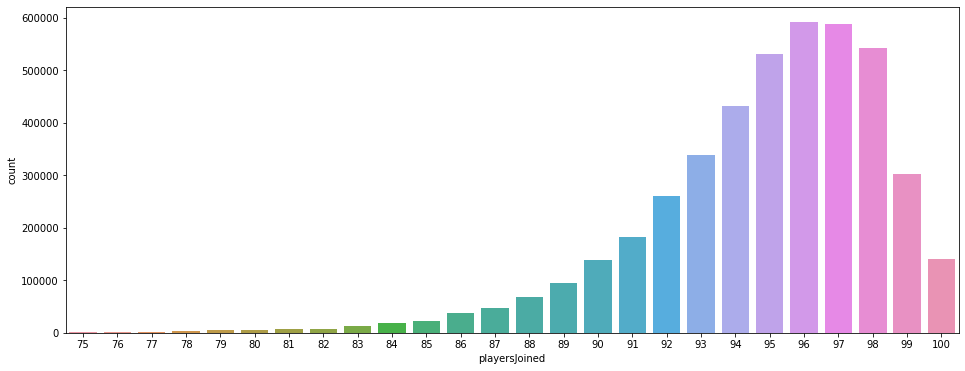

In [ ]:
sns.countplot(df[df['playersJoined']>=75]['playersJoined'])

**Analysing the data**

**Kills Without Moving**

In [ ]:
#info about total distance travelled
df['totalDistance']=(df['rideDistance']+df['walkDistance']+df['swimDistance'])

In [ ]:
#to check an anomaly detection that the person has not moved but killed
df['killsWithoutMoving']=((df['kills']>0) & (df['totalDistance']==0))

In [ ]:
df[df['killsWithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [ ]:
df[df['killsWithoutMoving']==True].shape

(1535, 32)

In [ ]:
#dropping this anomaly
df.drop(df[df['killsWithoutMoving']==True].index, inplace=True)

**Extra Ordinary Road Kills**

In [ ]:
df[df['roadKills']>5].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
39338,0097d2ae7a8576,b61edfa0c228d4,a786011fe206e9,1,2,495.7,4,0,0,2,...,0.0,0,0,72.80,1,0,0.9362,92,5202.80,False
90312,0e6ea81fd1b9b3,1e96ac916d6fbb,3f150f3834422c,2,6,190.0,0,0,5,2,...,0.0,0,1,976.80,4,0,0.9556,89,4257.80,False
197752,6cf1efa197bcc1,28df010b29a9e2,2e40495266529f,0,2,800.0,5,0,4,1,...,0.0,0,0,1516.00,3,0,0.6538,89,10085.00,False
209676,5df28fce2b8128,32a01a5517635a,ee9fb50eb0fe00,0,3,360.0,2,0,4,1,...,0.0,0,0,36.96,0,0,1.0000,59,6142.96,False
213544,612ee3024560a3,ab0162b0300c59,7c5535bfd43592,1,2,426.3,3,0,0,1,...,0.0,0,0,128.30,3,0,0.9167,96,3607.30,False


In [ ]:
df[df['roadKills']>5].shape

(46, 32)

In [ ]:
#dropping this anomaly
df.drop(df[df['roadKills']>5].index, inplace=True)

**So many kills but how ?**

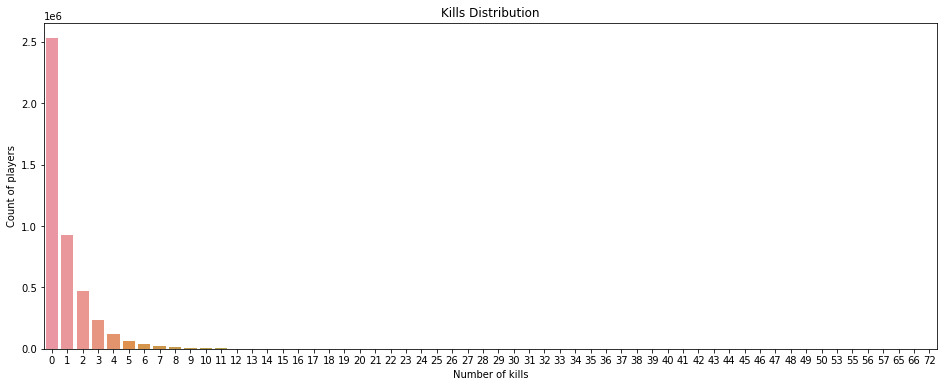

In [ ]:
sns.countplot(data=df, x=df['kills']).set_title('Kills Distribution')
plt.ylabel('Count of players')
plt.xlabel('Number of kills')
plt.show() #we see in here that most of the kills are 0,1,2 and 3.

In [ ]:
df[df['kills']>=15]['kills']

1292       15
2569       21
5589       17
15603      15
18038      17
           ..
4429354    17
4431091    16
4431589    28
4436193    18
4446353    16
Name: kills, Length: 1786, dtype: int64

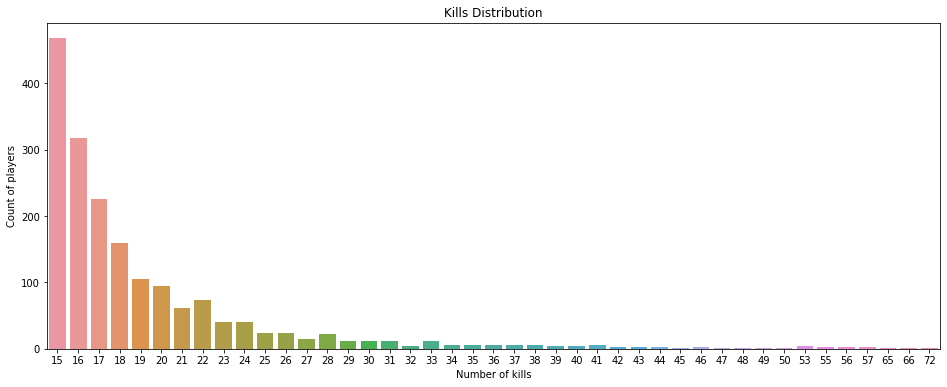

In [ ]:
sns.countplot(data=df, x=df[df['kills']>=15]['kills']).set_title('Kills Distribution')
plt.ylabel('Count of players')
plt.xlabel('Number of kills')
plt.show() #we see in here that most of the kills are 0,1,2 and 3.

In [ ]:
#dropping this anomaly
df[df['kills']>20].shape

(417, 32)

In [ ]:
df.drop(df[df['kills']>20].index, inplace=True)

**Head Shots**

In [ ]:
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

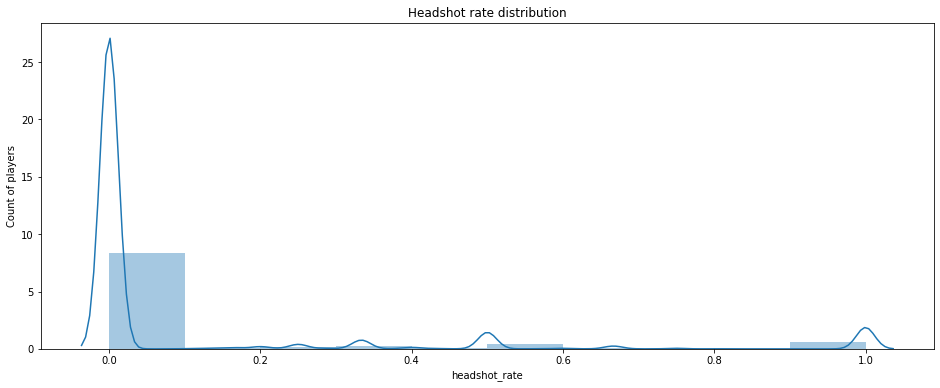

In [ ]:
#plot the headshot rate
sns.distplot(df['headshot_rate'], bins=10).set_title('Headshot rate distribution')
plt.ylabel('Count of players')
plt.show()

In [ ]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape #all of the kills are headshots this is an anomaly 

(187, 33)

In [ ]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index, inplace=True)

**Longest Shots**

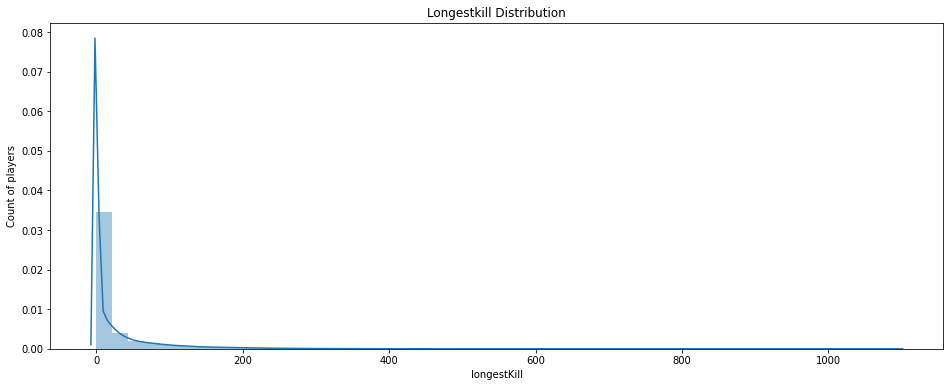

In [ ]:
sns.distplot(df['longestKill'], bins=50).set_title('Longestkill Distribution')
plt.ylabel('Count of players')
plt.show()

In [ ]:
df[df['longestKill']>=500].shape

(1738, 33)

In [ ]:
df.drop(df[df['longestKill']>=500].index, inplace=True)

**Weapon Change**

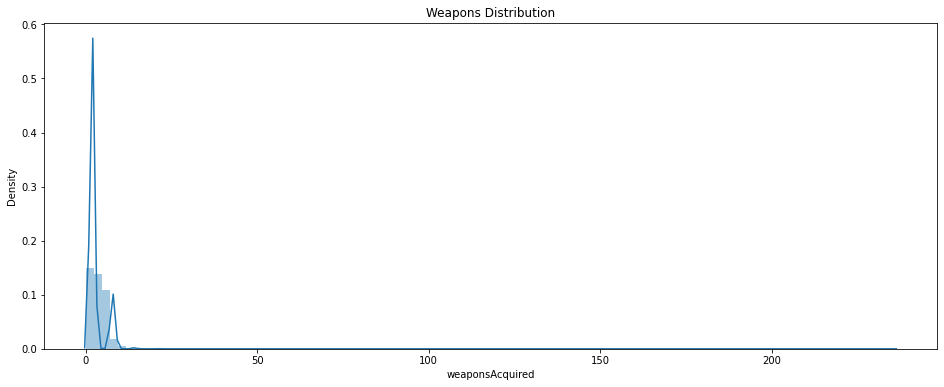

In [ ]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title('Weapons Distribution')
plt.show()

In [ ]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [ ]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace=True)

**Exploratory Data Analysis**

In [ ]:
df.shape

(4436233, 33)

In [ ]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killsWithoutMoving    0
headshot_rate         0
dtype: int64

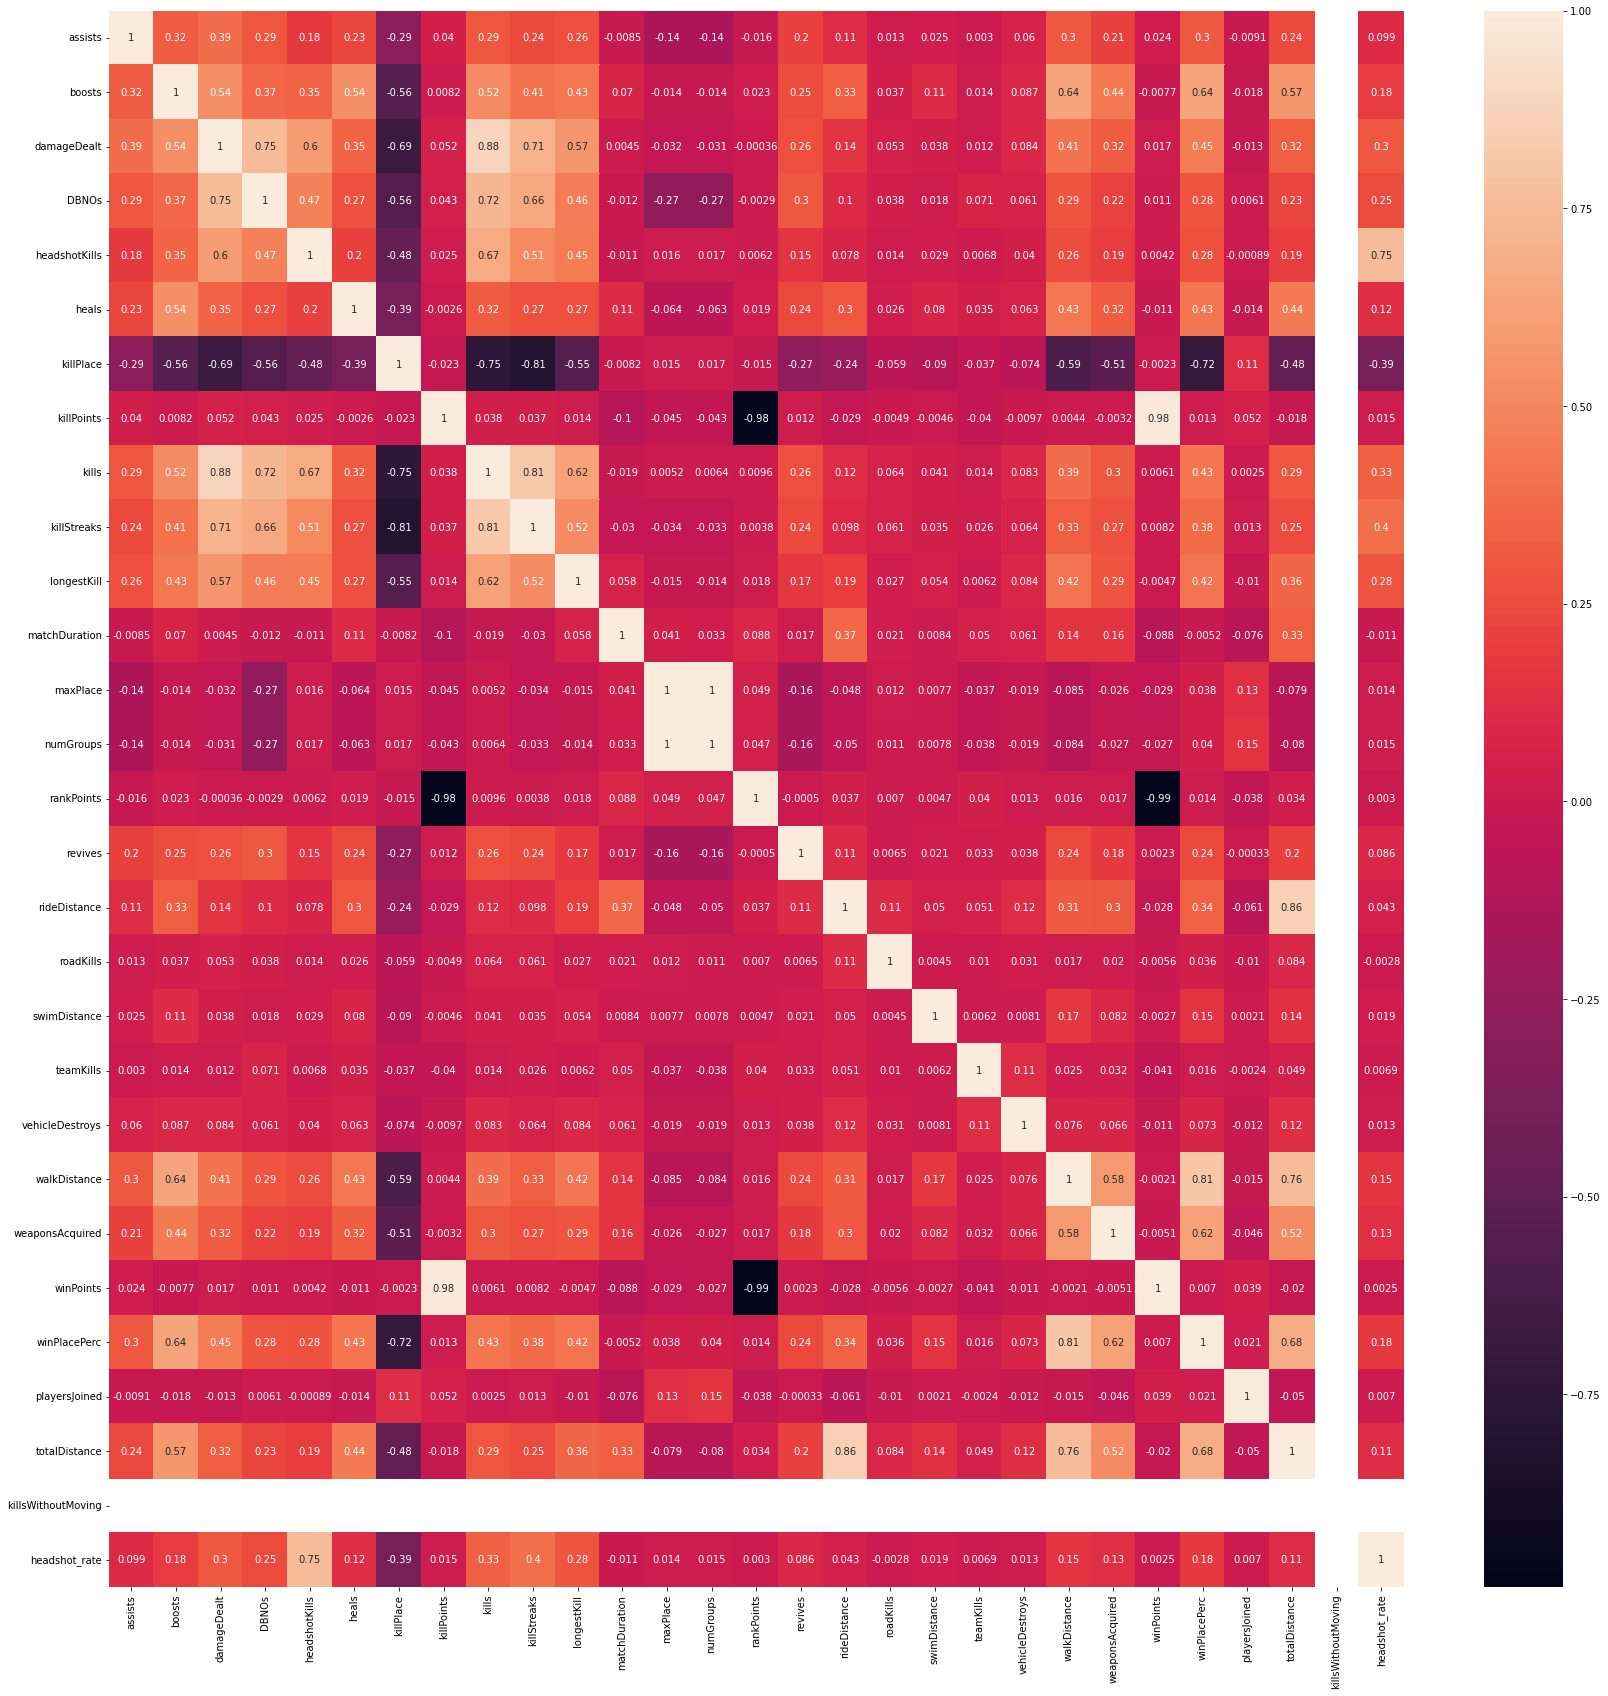

In [ ]:
#correlation of parameters with Win Prediction
plt.figure(figsize=(29,29))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### **Feature Engineering**

In [ ]:
normalising_factor=(100-df['playersJoined']/100)+1
normalising_factor

0          100.04
1          100.09
2          100.02
3          100.09
4          100.03
            ...  
4446961    100.06
4446962    100.07
4446963    100.02
4446964    100.06
4446965    100.02
Name: playersJoined, Length: 4436233, dtype: float64

In [ ]:
df['killsNorm']=df['kills']+normalising_factor
df['damageDealtNorm']=df['damageDealt']+normalising_factor
df['maxPlaceNorm']=df['maxPlace']+normalising_factor
df['matchDurationNorm']=df['matchDuration']+normalising_factor

df['traveldistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']
df['healsnboosts']=df['heals']+df['boosts']
df['assist']=df['assists']+df['revives']

In [ ]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killsWithoutMoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [ ]:
df=df.drop(columns=['Id', 'groupId', 'matchId', 'assists', 'boosts','walkDistance','swimDistance',
                    'rideDistance', 'heals','revives','kills','damageDealt','maxPlace','matchDuration'])

In [ ]:
df.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,100.04,100.04,128.04,1406.04,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,100.09,191.56,126.09,1877.09,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,100.02,168.02,150.02,1418.02,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,100.09,132.99,131.09,1536.09,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,101.03,200.03,197.03,1524.03,49.7500,0,0


### **Catboost Model**

**Handling categorical data**

In [ ]:
df.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,100.04,100.04,128.04,1406.04,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,100.09,191.56,126.09,1877.09,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,100.02,168.02,150.02,1418.02,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,100.09,132.99,131.09,1536.09,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,101.03,200.03,197.03,1524.03,49.7500,0,0


In [ ]:
x=df.drop(['winPlacePerc'], axis=1)
y=df['winPlacePerc'] #this will be our prediction

In [ ]:
features=x.columns
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'totalDistance', 'killsWithoutMoving', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [ ]:
x.dtypes

DBNOs                   int64
headshotKills           int64
killPlace               int64
killPoints              int64
killStreaks             int64
longestKill           float64
matchType              object
numGroups               int64
rankPoints              int64
roadKills               int64
teamKills               int64
vehicleDestroys         int64
weaponsAcquired         int64
winPoints               int64
playersJoined           int64
totalDistance         float64
killsWithoutMoving       bool
headshot_rate         float64
killsNorm             float64
damageDealtNorm       float64
maxPlaceNorm          float64
matchDurationNorm     float64
traveldistance        float64
healsnboosts            int64
assist                  int64
dtype: object

In [ ]:
x=pd.get_dummies(x, columns=['matchType','killsWithoutMoving']) #these are our categorical values
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
x.shape

(4436233, 40)

In [ ]:
features=x.columns
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playersJoined',
       'totalDistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'traveldistance', 'healsnboosts',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killsWithoutMoving_False'],
      dtype='object')

**Scaling The Data**

In [ ]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582948,-0.384165,0.449324,1.172491,-0.765121,-0.459623,-0.732885,-1.212390,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
1,-0.582948,-0.384165,0.340033,-0.804728,-0.765121,-0.459623,-0.775859,0.803565,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
2,-0.582948,-0.384165,-0.024272,-0.804728,-0.765121,-0.459623,0.169559,0.813067,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,-0.808943,0.0
3,-0.582948,-0.384165,0.995782,-0.804728,-0.765121,-0.459623,-0.560991,0.700391,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,-0.370796,-0.405066,1.236181,0.0
4,-0.582948,-0.384165,-0.097133,-0.804728,0.647737,0.727503,2.232287,0.906738,-0.049567,-0.142507,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206513,2.696902,-0.405066,-0.808943,0.0


**Splitting Data**

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105363, 40) (3105363,)
(1330870, 40) (1330870,)


**CatBoost Model**

It is a gradient boosting technique of the decision trees. Random forest is a technique where you are taking multiple decision trees running together and then getting the majority of the reasons.

In [ ]:
import catboost as cb
train_dataset=cb.Pool(xtrain, ytrain) #this is special for the cb function
test_dataset=cb.Pool(xtest,ytest)

In [ ]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
#Grid Searching
grid={'iterations': [100,150],
      'learning_rate':[0.03,0.1],
      'depth':[2,4,6,8]}

In [ ]:
model.grid_search(grid, train_dataset)

0:	learn: 0.5480985	test: 0.5486727	best: 0.5486727 (0)	total: 952ms	remaining: 1m 34s
1:	learn: 0.5332354	test: 0.5337938	best: 0.5337938 (1)	total: 1.25s	remaining: 1m 1s
2:	learn: 0.5188656	test: 0.5194102	best: 0.5194102 (2)	total: 1.54s	remaining: 49.9s
3:	learn: 0.5049623	test: 0.5054874	best: 0.5054874 (3)	total: 1.84s	remaining: 44.2s
4:	learn: 0.4915250	test: 0.4920378	best: 0.4920378 (4)	total: 2.15s	remaining: 40.9s
5:	learn: 0.4785252	test: 0.4790259	best: 0.4790259 (5)	total: 2.44s	remaining: 38.3s
6:	learn: 0.4659407	test: 0.4664248	best: 0.4664248 (6)	total: 2.75s	remaining: 36.6s
7:	learn: 0.4537628	test: 0.4542307	best: 0.4542307 (7)	total: 3.05s	remaining: 35s
8:	learn: 0.4419502	test: 0.4424068	best: 0.4424068 (8)	total: 3.34s	remaining: 33.8s
9:	learn: 0.4305462	test: 0.4309894	best: 0.4309894 (9)	total: 3.65s	remaining: 32.9s
10:	learn: 0.4195114	test: 0.4199403	best: 0.4199403 (10)	total: 3.95s	remaining: 32s
11:	learn: 0.4088471	test: 0.4092662	best: 0.4092662 (1

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [ ]:
features

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playersJoined',
       'totalDistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm',
       'maxPlaceNorm', 'matchDurationNorm', 'traveldistance', 'healsnboosts',
       'assist', 'matchType_crashfpp', 'matchType_crashtpp', 'matchType_duo',
       'matchType_duo-fpp', 'matchType_flarefpp', 'matchType_flaretpp',
       'matchType_normal-duo', 'matchType_normal-duo-fpp',
       'matchType_normal-solo', 'matchType_normal-solo-fpp',
       'matchType_normal-squad', 'matchType_normal-squad-fpp',
       'matchType_solo', 'matchType_solo-fpp', 'matchType_squad',
       'matchType_squad-fpp', 'killsWithoutMoving_False'],
      dtype='object')

In [1]:
#feature_importance_df=pd.DataFrame()
#feature_importance_df['features']=features
#feature_importance_df['importance']=model.feature_importances_

In [ ]:
feature_importance_df=feature_importance_df.sort_values(by=['importance'], ascending=False)
feature_importance_df #we can see the most important parameters in our model for prediction. 

,features,importance
2,2,41.886665
16,16,18.845158
20,20,13.852724
14,14,11.759409
19,19,4.840814
6,6,2.541484
21,21,1.761439
0,0,0.740624
13,13,0.728226
11,11,0.716381


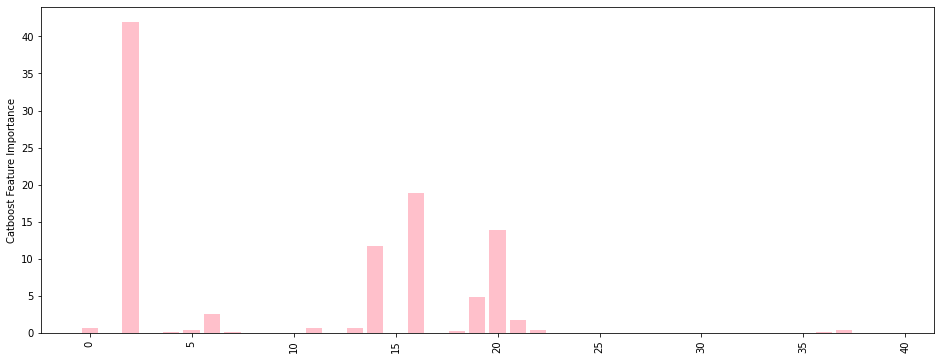

In [ ]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='pink')
plt.ylabel('Catboost Feature Importance')
plt.xticks(rotation=90)
plt.show()

**Model Prediction**

In [ ]:
pred=model.predict(xtest)
ytest[:10]

770097     0.3535
2847308    0.3542
2707138    0.3673
771417     0.4444
3655164    0.2692
452685     0.8571
3169952    0.4231
554497     0.1724
126186     0.9167
2133703    0.1111
Name: winPlacePerc, dtype: float64

In [ ]:
pred[:10]

array([0.39141302, 0.3326175 , 0.44105619, 0.35306804, 0.27186719,
       0.86845794, 0.52864718, 0.09968652, 0.89842461, 0.1702618 ])

In [ ]:
rmse=np.sqrt(mean_squared_error(ytest,pred)) #rmse is our root mse
r2= r2_score(ytest, pred) #this score indicates how much your model is relevant that is how much our model able to fit.

print('Testing Performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))


Testing Performance
RMSE: 0.08
R2: 0.93


In here we see that our RMSE is 0.08 and R2 score is 0.93 and our model has only 8% percent wrong. Plus, when we check our R2 score we can say that it is very much closer to 1 model performance is good and is not overfitting in this case.